<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Machine Learning - 2301CS621</b></center>

<center><b><h1>Lab - 12 </b></center>
<pre>    

# Multilayer Perceptron (MLP) on MNIST and CIFAR-10


**Steps:**
1. Load and preprocess the datasets
2. Build an MLP model
3. Train the model
4. Evaluate the model


## Understanding the Datasets
Before we start training a model, let's understand the datasets:
- **MNIST**: 28x28 grayscale images of handwritten digits (0-9)
- **CIFAR-10**: 32x32 color images belonging to 10 different classes

We will process each dataset step by step and train a Multilayer Perceptron (MLP) model.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

### Step 1: Load the MNIST Dataset
TensorFlow provides built-in datasets, including MNIST, which we can load directly.

In [5]:
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = keras.datasets.mnist.load_data()

### Step 2: Preprocess MNIST
To prepare the data for training, we need to:
- Normalize pixel values (scale between 0 and 1)
- Flatten images from 28x28 matrices to 784-length vectors
- Display a few sample images to understand the dataset

In [6]:
x_train_mnist, x_test_mnist = x_train_mnist / 255.0, x_test_mnist / 255.0

x_train_mnist = x_train_mnist.reshape(-1, 28*28)
x_test_mnist = x_test_mnist.reshape(-1, 28*28)

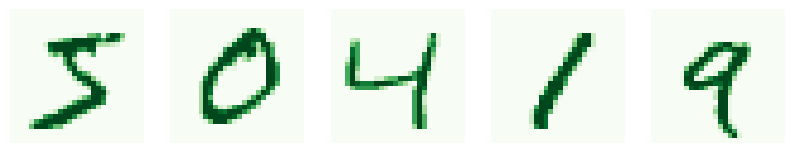

In [9]:
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i, ax in enumerate(axes):
    ax.imshow(x_train_mnist[i].reshape(28, 28), cmap='Greens')
    ax.axis('off')
plt.show()

### Step 3: Define MLP Architecture
An MLP consists of fully connected layers. For MNIST, we use:
- **Input Layer**: 784 neurons (one per pixel)
- **Hidden Layer 1**: 128 neurons, ReLU activation
- **Hidden Layer 2**: 64 neurons, ReLU activation
- **Output Layer**: 10 neurons (one per digit), Softmax activation

In [10]:
def create_mlp(input_shape, num_classes):
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(input_shape,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [11]:
mlp_mnist = create_mlp(28*28, 10)
mlp_mnist.fit(x_train_mnist, y_train_mnist, epochs=10, batch_size=128, validation_data=(x_test_mnist, y_test_mnist))

c:\Users\Jay Ashapura Maa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8433 - loss: 0.5817 - val_accuracy: 0.9537 - val_loss: 0.1538
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9574 - loss: 0.1456 - val_accuracy: 0.9638 - val_loss: 0.1133
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9711 - loss: 0.0946 - val_accuracy: 0.9713 - val_loss: 0.0938
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9782 - loss: 0.0729 - val_accuracy: 0.9729 - val_loss: 0.0841
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9831 - loss: 0.0550 - val_accuracy: 0.9735 - val_loss: 0.0819
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9866 - loss: 0.0456 - val_accuracy: 0.9743 - val_loss: 0.0813
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9892 - loss: 0.0370 - val_accuracy: 0.9776 - val_loss: 0.0702
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9917 - loss: 0.0264 - val_accuracy: 0.

### Step 4: Train the MNIST Model
Train the model using the `.fit()` function, specifying training data, epochs, and validation data.

In [12]:
mlp_mnist.fit(
    x_train_mnist, y_train_mnist, 
    epochs=10, 
    batch_size=128, 
    validation_data=(x_test_mnist, y_test_mnist)
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9955 - loss: 0.0161 - val_accuracy: 0.9767 - val_loss: 0.0839
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9957 - loss: 0.0136 - val_accuracy: 0.9784 - val_loss: 0.0775
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9975 - loss: 0.0098 - val_accuracy: 0.9753 - val_loss: 0.0997
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9963 - loss: 0.0124 - val_accuracy: 0.9777 - val_loss: 0.0835
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9971 - loss: 0.0094 - val_accuracy: 0.9765 - val_loss: 0.0933
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9976 - loss: 0.0078 - val_accuracy: 0.9767 - val_loss: 0.0968
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9968 - loss: 0.0101 - val_accuracy: 0.9767 - val_loss: 0.0990
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9978 - loss: 0.0077 - val_accuracy: 0.

### Step 5: Evaluate the MNIST Model

In [ ]:
mnist_test_loss, mnist_test_acc = mlp_mnist.evaluate(x_test_mnist, y_test_mnist)

print("MNIST Test Loss:", mnist_test_loss)
print("MNIST Test Accuracy:", mnist_test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9749 - loss: 0.1226
MNIST Test Loss: 0.10126260668039322
MNIST Test Accuracy: 0.978600025177002


### Step 4.1: print Model summary()

In [14]:
mlp_mnist.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

# Repeat Steps for CIFAR-10

In [15]:
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = keras.datasets.cifar10.load_data()

In [18]:
x_train_cifar, x_test_cifar = x_train_cifar / 255.0, x_test_cifar / 255.0

x_train_cifar = x_train_cifar.reshape(-1, 32*32*3)
x_test_cifar = x_test_cifar.reshape(-1, 32*32*3)

In [19]:
mlp_cifar = create_mlp(32*32*3, 10)

c:\Users\Jay Ashapura Maa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
cifar_test_loss, cifar_test_acc = mlp_cifar.evaluate(x_test_cifar, y_test_cifar)

print("CIFAR-10 Test Loss:", cifar_test_loss)
print("CIFAR-10 Test Accuracy:", cifar_test_acc)

mlp_cifar.summary()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1043 - loss: 2.3026
CIFAR-10 Test Loss: 2.3025877475738525
CIFAR-10 Test Accuracy: 0.10170000046491623


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 402,250 (1.53 MB)

 Trainable params: 402,250 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

# Repeat Steps for CIFAR-100

In [22]:
(x_train_cifar100, y_train_cifar100), (x_test_cifar100, y_test_cifar100) = keras.datasets.cifar100.load_data()

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 144s 1us/step


In [23]:
x_train_cifar100, x_test_cifar100 = x_train_cifar100 / 255.0, x_test_cifar100 / 255.0

x_train_cifar100 = x_train_cifar100.reshape(-1, 32*32*3)
x_test_cifar100 = x_test_cifar100.reshape(-1, 32*32*3)

In [24]:
mlp_cifar100 = create_mlp(32*32*3, 100)

In [25]:
cifar100_test_loss, cifar100_test_acc = mlp_cifar100.evaluate(x_test_cifar100, y_test_cifar100)

print("CIFAR-100 Test Loss:", cifar100_test_loss)
print("CIFAR-100 Test Accuracy:", cifar100_test_acc)

mlp_cifar100.summary()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0079 - loss: 4.6859
CIFAR-100 Test Loss: 4.686574935913086
CIFAR-100 Test Accuracy: 0.00800000037997961


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │         6,500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 408,100 (1.56 MB)

 Trainable params: 408,100 (1.56 MB)

 Non-trainable params: 0 (0.00 B)